## Seaborn

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive graphs.

Seaborn has a lot to offer. You can create graphs in one line that would take you multiple tens of lines in Matplotlib. Its standard designs are awesome and it also has a nice interface for working with pandas dataframes.

In [2]:
import subprocess
import sys
reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]

import sys

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#  seaborn
if  not 'seaborn' in installed_packages:
  !pip install seaborn

In [5]:
import seaborn as sns
print("Seaborn version: ",sns.__version__)

Seaborn version:  0.9.0


#### Sample datasets for Seaborn are at 
https://github.com/mwaskom/seaborn-data

In [6]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


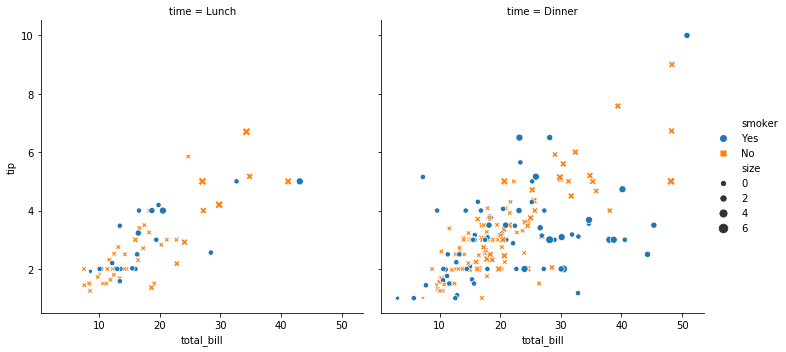

In [7]:
sns.relplot(x="total_bill", y="tip", 
            col="time", # Categorical variables that will determine the faceting of the grid.
            hue="smoker", # Grouping variable that will produce elements with different colors.
            style="smoker", # Grouping variable that will produce elements with different styles.
            size="size", # Grouping variable that will produce elements with different sizes.
            data=tips)

In [10]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter plot

We can use the .scatterplot method for creating a scatterplot, and just as in Pandas we need to pass it the column names of the x and y data, but now we also need to pass the data as an additional argument because we aren’t calling the function on the data directly as we did in Pandas.

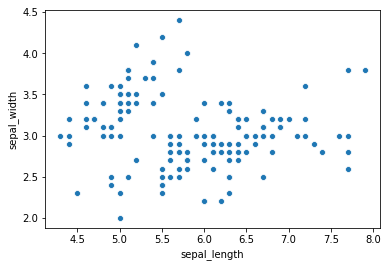

In [11]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

We can also highlight the points by class using the hue argument, which is a lot easier than in Matplotlib.

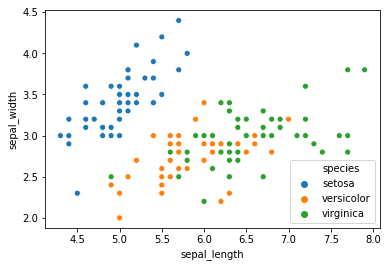

In [13]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

### Line chart

To create a line-chart the sns.lineplot method can be used. The only required argument is the data, which in our case are the four numeric columns from the Iris dataset. We could also use the sns.kdeplot method which rounds of the edges of the curves and therefore is cleaner if you have a lot of outliers in your dataset.

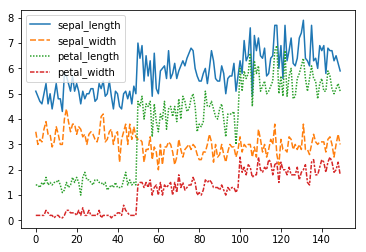

In [16]:
sns.lineplot(data=iris.drop(['species'], axis=1))

In [17]:
titanic=sns.load_dataset('titanic')

In [18]:
titanic.shape

(891, 15)

In [21]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
659,0,1,male,58.0,0,2,113.2750,C,First,man,True,D,Cherbourg,no,False
250,0,3,male,NaN,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
381,1,3,female,1.0,0,2,15.7417,C,Third,child,False,NaN,Cherbourg,yes,False
765,1,1,female,51.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
768,0,3,male,NaN,1,0,24.1500,Q,Third,man,True,NaN,Queenstown,no,False


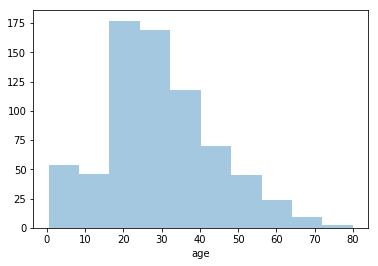

In [27]:
sns.distplot(titanic['age'], bins=10, kde=False)

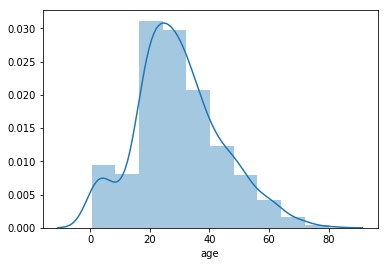

In [28]:
sns.distplot(titanic['age'], bins=10, kde=True)

### Bar chart

In Seaborn a bar-chart can be created using the sns.countplot method and passing it the data.

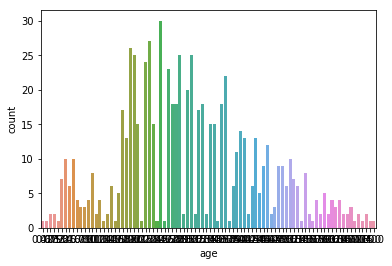

In [30]:
sns.countplot(titanic['age'])

## Other graphs

Now that you have a basic understanding of the Matplotlib, Pandas Visualization and Seaborn syntax I want to show you a few other graph types that are useful for extracting insides.

For most of them, Seaborn is the go-to library because of its high-level interface that allows for the creation of beautiful graphs in just a few lines of code.
### Box plots

A Box Plot is a graphical method of displaying the five-number summary. We can create box plots using seaborns sns.boxplot method and passing it the data as well as the x and y column name.

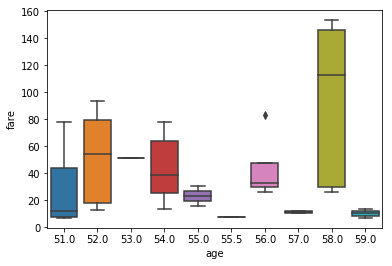

In [35]:
titanic_age = titanic[(titanic['age']>=51) & (titanic['age']<60)]
sns.boxplot('age', 'fare', data=titanic_age)

Box Plots, just like bar-charts are great for data with only a few categories but can get messy really quickly.
Heatmap

### A Heatmap 

is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.

To get the correlation of the features inside a dataset we can call &lt;dataset&gt;.corr(), which is a Pandas dataframe method. This will give us the correlation matrix.&lt;/dataset&gt;

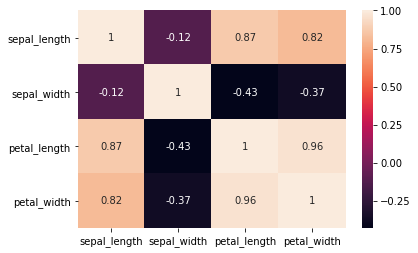

In [36]:
sns.heatmap(iris.corr(), annot=True)

### Faceting

Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.

Faceting is really helpful if you want to quickly explore your dataset.

To use one kind of faceting in Seaborn we can use the FacetGrid. First of all, we need to define the FacetGrid and pass it our data as well as a row or column, which will be used to split the data. Then we need to call the map function on our FacetGrid object and define the plot type we want to use, as well as the column we want to graph.

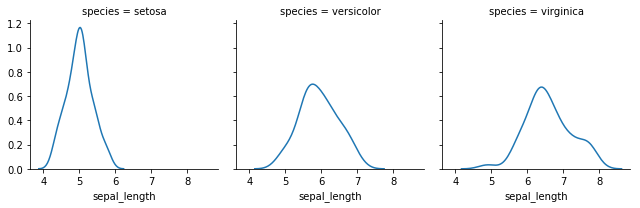

In [39]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

You can make plots a lot bigger and more complicated than the example above. You can find a few examples here.
Pairplot

Lastly, I will show you Seaborns pairplot and Pandas scatter_matrix , which enable you to plot a grid of pairwise relationships in a dataset.


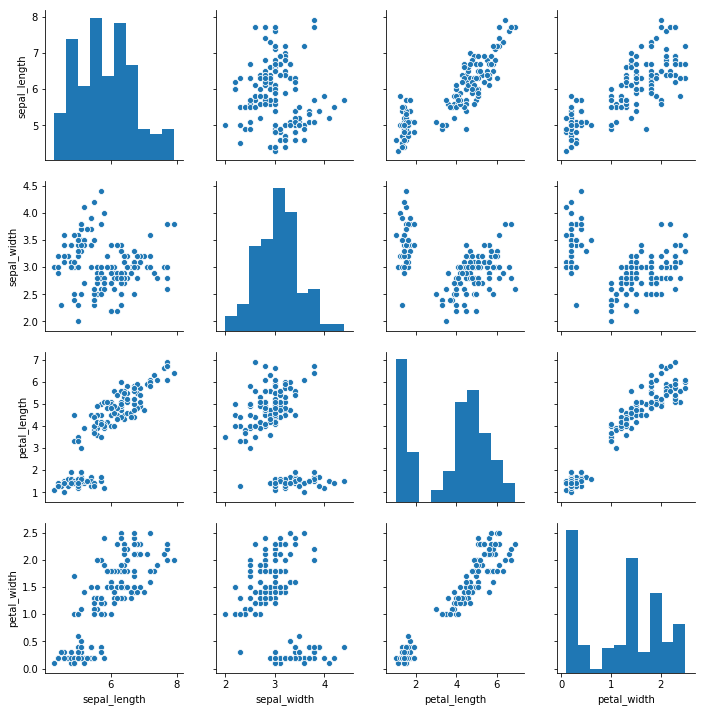

In [40]:
sns.pairplot(iris)

As you can see in the images above these techniques are always plotting two features with each other. The diagonal of the graph is filled with histograms and the other plots are scatter plots.